## Importing Libraries ##

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

## Checking Working Directories ##

In [53]:
import os
print(os.getcwd())

C:\Users\Obinna J. Duruiheme\Customer Churn\Notebook


In [54]:
print(os.listdir())

['.ipynb_checkpoints', 'Customer Churn.ipynb']


## Loading Data ##

In [55]:
df = pd.read_excel("../Data/Dataset.xlsx")

## Exploring Dataset ##

In [56]:
df.head(3)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10


In [57]:
df.tail(3)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
12480,13481,Lisa Rodgers,38,Male,East Erin,william37@example.com,951-489-9554,"56050 Steven Summit Suite 383\nJohnmouth, NM 2...",Segment C,"[{'Product': 'Furisode Kimonos', 'Frequency': ...",...,"[{'Type': 'Email', 'Date': '2020-05-22'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 26...","{'PageViews': 96, 'TimeSpent(minutes)': 1}","[{'Action': 'Search', 'Page': 'author', 'Times...","{'Logins': 9, 'Frequency': 'Monthly'}","{'Rating': 5, 'Comment': 'Offer particularly s...","[{'Email_Sent': '2020-05-18', 'Email_Opened': ...",1,1,2020-10-13 15:09:13
12481,13482,Kristin Carey,26,Female,New Leah,josephcarter@example.net,001-335-464-3236x722,"72356 Teresa Rapid\nPorterborough, SC 40076",Segment A,"[{'Product': 'Sequins & Glitter', 'Frequency':...",...,"[{'Type': 'Call', 'Date': '2020-09-11'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 30...","{'PageViews': 63, 'TimeSpent(minutes)': 2}","[{'Action': 'Click', 'Page': 'post', 'Timestam...","{'Logins': 2, 'Frequency': 'Monthly'}","{'Rating': 5, 'Comment': 'Rest something conce...","[{'Email_Sent': '2021-09-05', 'Email_Opened': ...",0,0,2020-06-24 23:49:01
12482,13483,Melissa Carter,29,Male,West Amanda,regina88@example.net,816-238-9247,USCGC Lopez\nFPO AE 85542,Segment C,"[{'Product': 'Pool Brushes & Brooms', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-02-17'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 11...","{'PageViews': 93, 'TimeSpent(minutes)': 6}","[{'Action': 'Add to Cart', 'Page': 'category',...","{'Logins': 6, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Indeed foot trouble ...","[{'Email_Sent': '2021-02-08', 'Email_Opened': ...",2,1,2022-07-14 07:27:52


In [58]:
df.shape

(12483, 21)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [60]:
df.nunique()

CustomerID                12483
Name                      11617
Age                          53
Gender                        2
Location                   9255
Email                     12138
Phone                     12483
Address                   12483
Segment                       3
PurchaseHistory           12483
SubscriptionDetails       12472
ServiceInteractions       12467
PaymentHistory             6173
WebsiteUsage               6248
ClickstreamData           12483
EngagementMetrics            90
Feedback                  12483
MarketingCommunication    12479
NPS                          10
ChurnLabel                    2
Timestamp                 12482
dtype: int64

In [61]:
df.describe(include = 'all')

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
count,12483.00000,12483,12483.000000,12483,12483,12483,12483,12483,12483,12483,...,12483,12483,12483,12483,12483,12483,12483,12483.000000,12483.000000,12483
unique,NaN,11617,NaN,2,9255,12138,12483,12483,3,12483,...,12467,6173,6248,12483,90,12483,12479,NaN,NaN,12482
top,NaN,Michael Johnson,NaN,Male,Lake Michael,wsmith@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment C,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2020-03-26'}]","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 85, 'TimeSpent(minutes)': 3}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 1, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2022-12-26', 'Email_Opened': ...",NaN,NaN,2020-10-21 06:44:42
freq,NaN,6,NaN,6269,17,5,1,1,4199,1,...,2,42,9,1,167,1,2,NaN,NaN,2
mean,7242.00000,NaN,43.930065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.973884,0.505808,NaN
std,3603.67604,NaN,15.341521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.644623,0.499986,NaN
min,1001.00000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,4121.50000,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN
50%,7242.00000,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN
75%,10362.50000,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN


In [62]:
df.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


## Exploratory Data Analysis ##

In [63]:
# Select the numerical columns
df_numerical = df[['Age', 'NPS', 'ChurnLabel']]

In [64]:
corr = (df_numerical.corr())
corr

,Age,NPS,ChurnLabel
Age,1.000000,0.000006,0.010273
NPS,0.000006,1.000000,-0.540703
ChurnLabel,0.010273,-0.540703,1.000000


#### Correlation Heatmap of numerical values ####

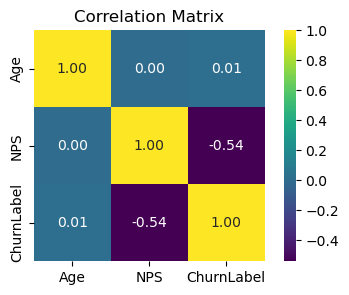

In [65]:
plt.figure(figsize=(5, 3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

**Exploring and visualizing Age Column**

In [67]:
df['Age'].min()

18

In [68]:
df['Age'].max()

70

In [69]:
df['Age'].mean()

43.93006488824802

In [70]:
df['Age'].std()

15.34152135256695

<Figure size 500x300 with 0 Axes>

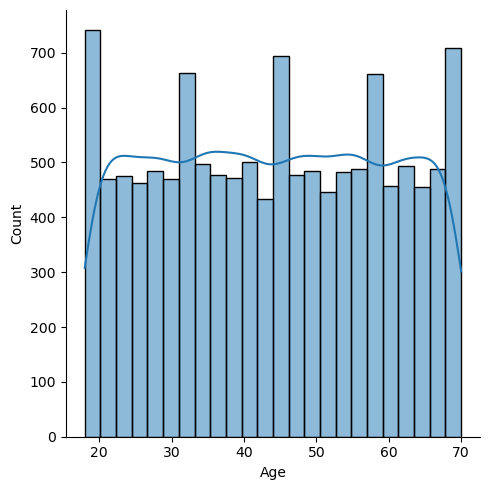

In [75]:
plt.figure(figsize=(5, 3))

sns.displot(df['Age'],kde = True)

****Exploring and visualizing NPS Column****

In [82]:
# Calculate min, max, mean, and std for ChurnLabel
churn_stats = df['NPS'].agg(['min', 'max', 'mean', 'std'])

# Display the results
print(churn_stats)

min     0.000000
max     9.000000
mean    2.973884
std     2.644623
Name: NPS, dtype: float64


<Figure size 500x300 with 0 Axes>

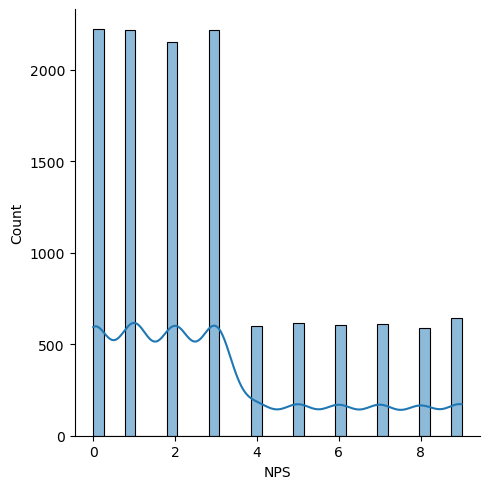

In [80]:
plt.figure(figsize=(5, 3))

sns.displot(df['NPS'],kde = True)

**Exploring and visualizing ChurnLabel Column**

In [81]:
# Calculate min, max, mean, and std for ChurnLabel
churn_stats = df['ChurnLabel'].agg(['min', 'max', 'mean', 'std'])

# Display the results
print(churn_stats)

min     0.000000
max     1.000000
mean    0.505808
std     0.499986
Name: ChurnLabel, dtype: float64


<Figure size 500x300 with 0 Axes>

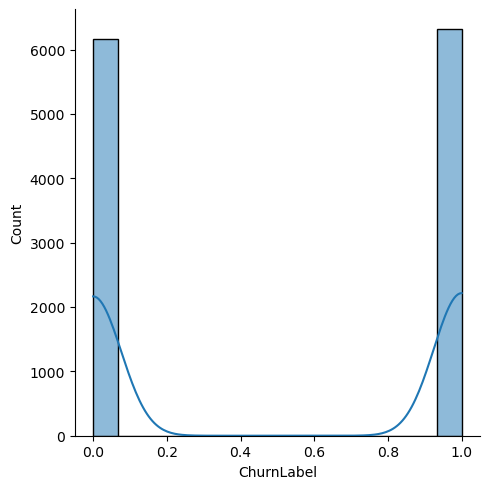

In [83]:
plt.figure(figsize=(5, 3))

sns.displot(df['ChurnLabel'],kde = True)

In [66]:
df_categorical = df[['Name','Gender','Location','Email','Address','Segment','PurchaseHistory','SubscriptionDetails','ServiceInteractions','PaymentHistory','WebsiteUsage','ClickstreamData','EngagementMetrics','Feedback','MarketingCommunication']]
df_categorical.head(1)

,Name,Gender,Location,Email,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication
0,Mark Barrett,Male,Andrewfort,allison74@example.net,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ..."


**Exploring and visualizing Gender Column**

In [96]:
# Get unique genders and their counts
gender_counts = df['Gender'].value_counts()

# Display the results
unique_genders = gender_counts.index.tolist()
count_genders = gender_counts.values.tolist()

# Print unique genders and their counts
print("Unique Genders:", unique_genders)
print("Counts:", count_genders)

Unique Genders: ['Male', 'Female']
Counts: [6269, 6214]


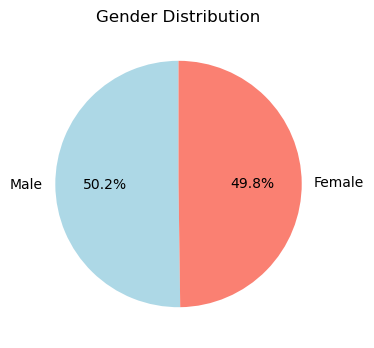

In [98]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()


# Plotting a pie chart

plt.figure(figsize=(4, 4))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Gender Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

**Exploring and visualizing Segment Column**

In [99]:
# Get unique Segments and their counts
Segment_counts = df['Segment'].value_counts()

# Display the results
unique_Segments = Segment_counts.index.tolist()
count_Segments = Segment_counts.values.tolist()

# Print unique Segment and their counts
print("Unique Segment:", unique_Segments)
print("Counts:", count_Segments)

Unique Segment: ['Segment C', 'Segment A', 'Segment B']
Counts: [4199, 4157, 4127]


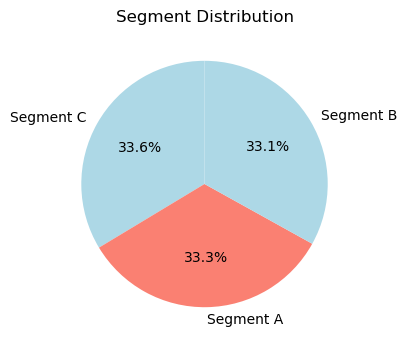

In [100]:
# Count the occurrences of each Segment
gender_counts = df['Segment'].value_counts()


# Plotting a pie chart

plt.figure(figsize=(4, 4))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Segment Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

In [86]:
df['Location'].nunique()

9255

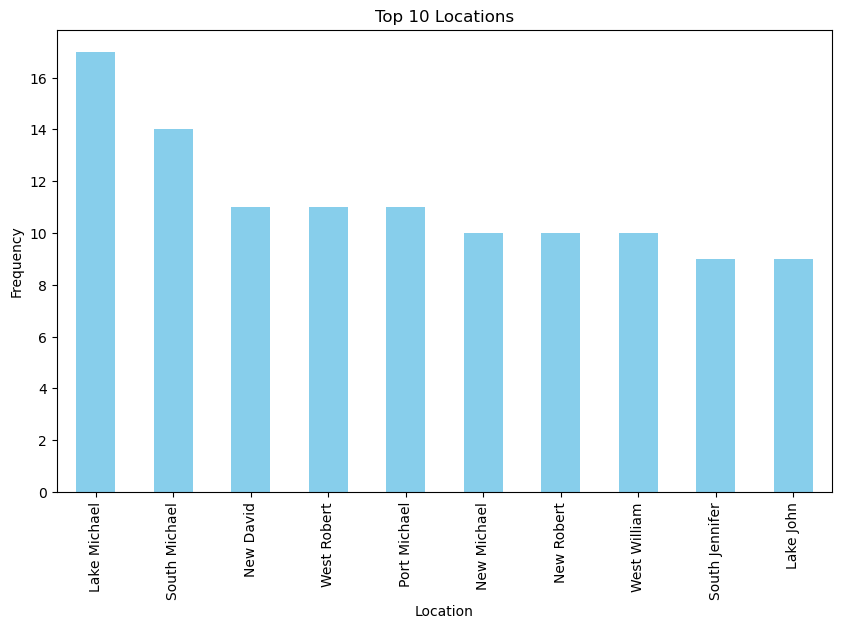

In [89]:
# The top 10 locations

top_n = 10  
top_locations = df['Location'].value_counts().head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()